In [158]:
from tanh import Tanh
from numpy import tanh as tgh
import numpy as np
import timeit
import pandas as pd
import seaborn as sns
from tqdm import tqdm

sns.color_palette("Spectral", as_cmap=True)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})



my_tgh = Tanh()

### Замеры скорости и сравнение с numpy версией tanh

### Скалярный вход

In [169]:
n = 10000000
x = 100

In [170]:
t0 = timeit.Timer(
    stmt="my_tanh(x)",
    setup="""from tanh import Tanh\nmy_tanh=Tanh()""",
    globals={"x": x},
)

t1 = timeit.Timer(
    stmt="tanh(x)",
    setup="""from numpy import tanh""",
    globals={"x": x},
)

print(f"число замеров: {n}")
print("______________________________________________________________________________")
print("___________________________scalar forward_____________________________________")
print(f"my_tanh(x):  {t0.timeit(n) / n * 1e6:>5.1f} us")
print(f"numpy_tanh(x):      {t1.timeit(n) / n * 1e6:>5.1f} us")
     

число замеров: 10000000
______________________________________________________________________________
___________________________scalar forward_____________________________________
my_tanh(x):    0.8 us
numpy_tanh(x):        1.3 us


Средняя скорость работы наивной реализации практически в два раза меньше

### Матричный вход

In [167]:
n = 100

matrix_shape = (10, 10)


x = np.random.rand(*matrix_shape)

In [168]:
n = 100000

t0 = timeit.Timer(
    stmt="my_tanh(x)",
    setup="""from tanh import Tanh\nmy_tanh=Tanh()""",
    globals={"x": x.tolist()},
)

t1 = timeit.Timer(
    stmt="tanh(x)",
    setup="""from numpy import tanh""",
    globals={"x": x},
)

print(f"число замеров: {n}")
print("______________________________________________________________________________")
print("______________________________matrix forward__________________________________")
print(f"my_tanh(x):  {t0.timeit(n) / n * 1e6:>5.1f} us")
print(f"numpy_tanh(x):      {t1.timeit(n) / n * 1e6:>5.1f} us")

число замеров: 100000
______________________________________________________________________________
______________________________matrix forward__________________________________
my_tanh(x):   59.1 us
numpy_tanh(x):        1.9 us


видно что на матрицах наивная реализация заметно медленее

это происходит за счёт векторизации в numpy

In [171]:
my_tanh_times, numpy_tanh_times = [], []

for i in tqdm(range(1, 11)):
    n = 10**(max(5, 8 - i))

    matrix_shape = (i, i)
    x = np.random.rand(*matrix_shape)
    
    t0 = timeit.Timer(
        stmt="my_tanh(x)",
        setup="""from tanh import Tanh\nmy_tanh=Tanh()""",
        globals={"x": x.tolist()},
    )

    t1 = timeit.Timer(
        stmt="tanh(x)",
        setup="""from numpy import tanh""",
        globals={"x": x},
    )
    
    my_tanh_times.append(t0.timeit(n) / n * 1e6)
    numpy_tanh_times.append(t1.timeit(n) / n * 1e6)
    
df = pd.DataFrame({
    'time': my_tanh_times + numpy_tanh_times,
    'matrix_shape_n':  2*list(range(1, 11)),
    'func': ['naive'] * 10 + ['numpy'] * 10,
})

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.74s/it]


<AxesSubplot:xlabel='matrix_shape_n', ylabel='time'>

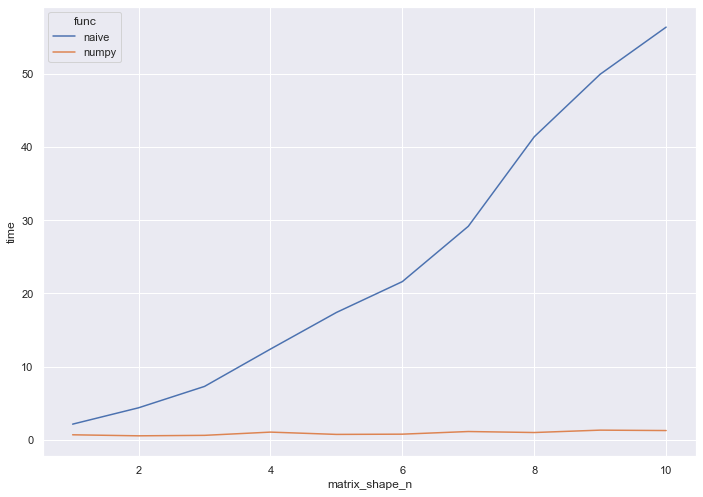

In [172]:
sns.lineplot(data=df, x="matrix_shape_n", y="time", hue="func")